<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Unsupervised_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Means Clusterings Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=44)

In [ ]:
X.shape

(1000, 2)

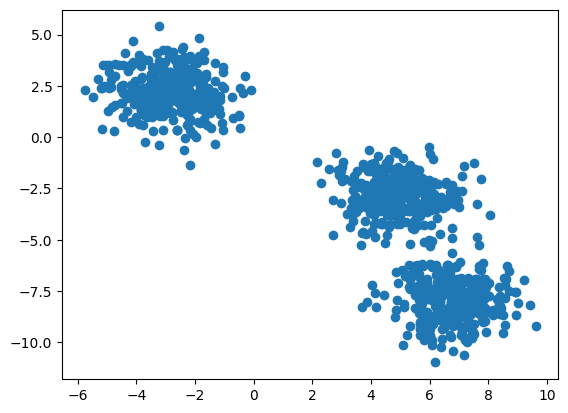

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Manual Process
# Elbow method to select K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)  # in inertia_ parameter wcss value come

In [ ]:
wcss

[24943.61237881288,
 4689.032288759044,
 1322.0752197885245,
 1167.4153769624875,
 1030.2906011230045,
 914.9655355514211,
 761.7343767822945,
 640.2302021976957,
 561.5545696828457,
 529.1260860653186]

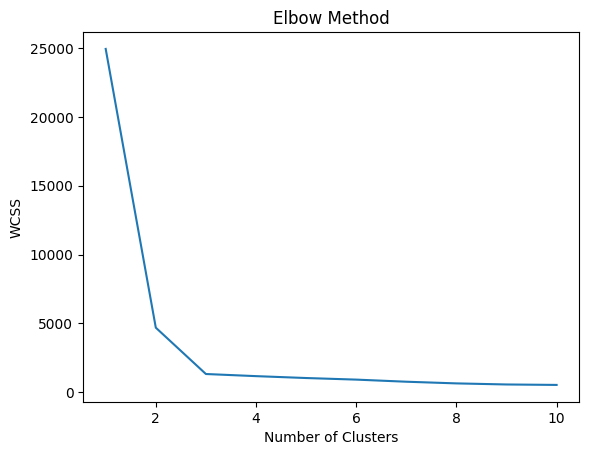

In [ ]:
# plot elbow wcss
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [ ]:
y_labels = kmeans.fit_predict(X_train)

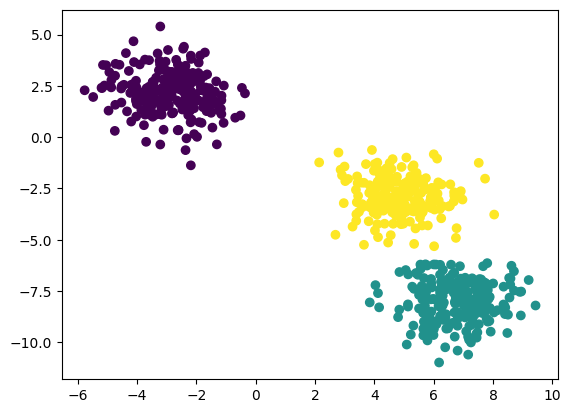

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1], c= y_labels)

In [ ]:
y_test_label =kmeans.predict(X_test)

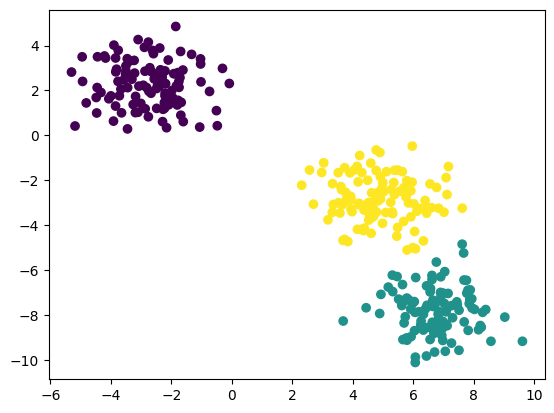

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c= y_test_label)

In [ ]:
## knee locator ( this is automatic finidng elbow)
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve='convex', direction= 'decreasing')
kl.elbow

np.int64(3)

In [ ]:
## performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

[np.float64(0.7261429542304338),
 np.float64(0.7249330865279574),
 np.float64(0.598872835539779),
 np.float64(0.5983443558120097),
 np.float64(0.32739175735952214),
 np.float64(0.3435389893695741),
 np.float64(0.3381336826805937),
 np.float64(0.3584142496039128),
 np.float64(0.33396085394379416)]

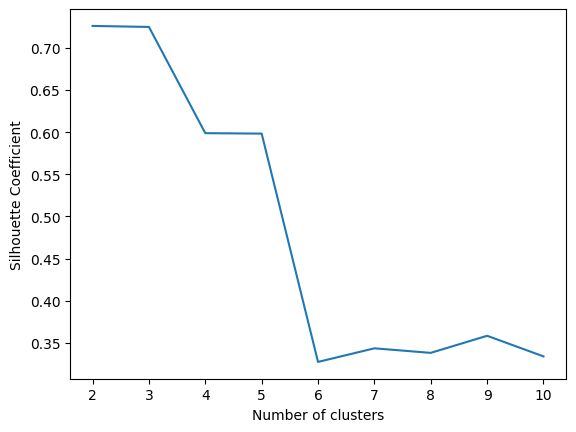

In [ ]:
## plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Heirarchial Clustering Implement

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
## Standadization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(iris_data)

In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
X_scaled.shape

(150, 4)

In [ ]:
## Apply the PCA  ( use when want to reduce dimension we will make it 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # means 4 will convert into 2 D
pca

PCA(n_components=2)

In [ ]:
pca_scaled = pca.fit_transform(X_scaled)

pca_scaled.shape

(150, 2)

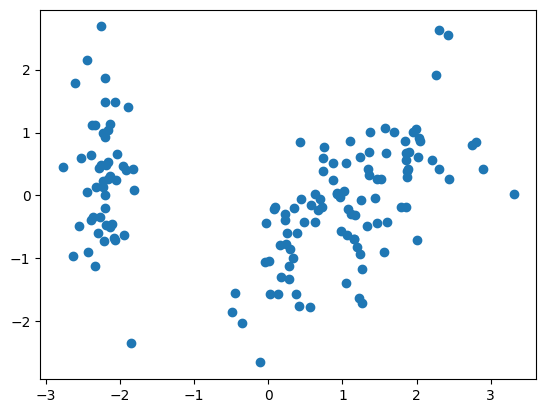

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

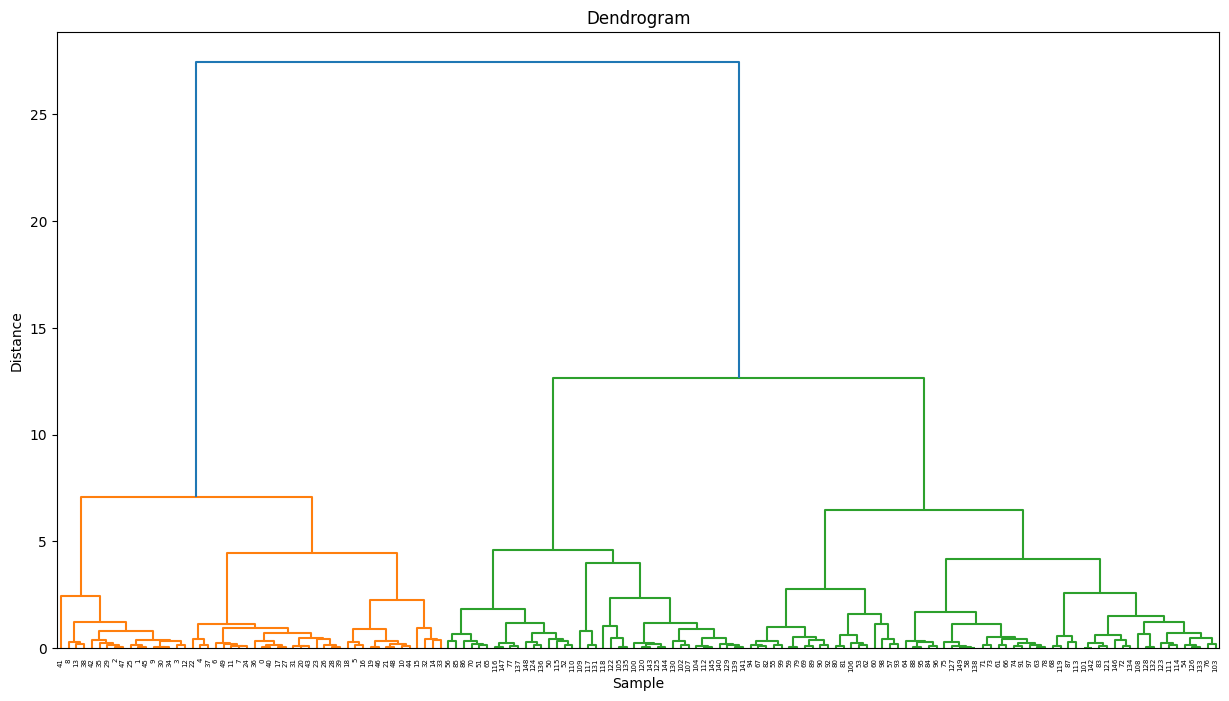

In [ ]:
## Agglomerative Clustering ( to draw a dendogram)
## to construct a dendogram
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(15,8))
plt.title('Dendrogram')

## create dendogram
dend = sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [ ]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

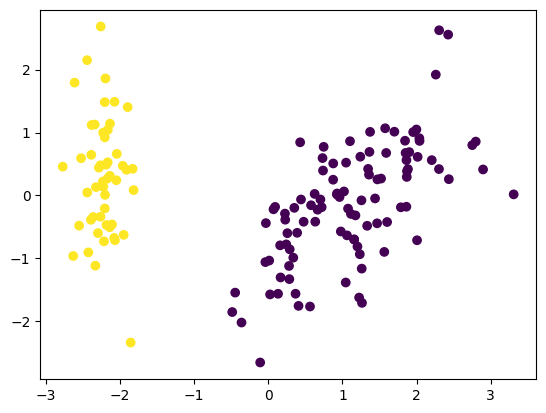

In [ ]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1], c= cluster.labels_)

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
  agglo.fit(pca_scaled)
  score = silhouette_score(X_scaled, agglo.labels_)
  silhouette_coefficients.append(score)

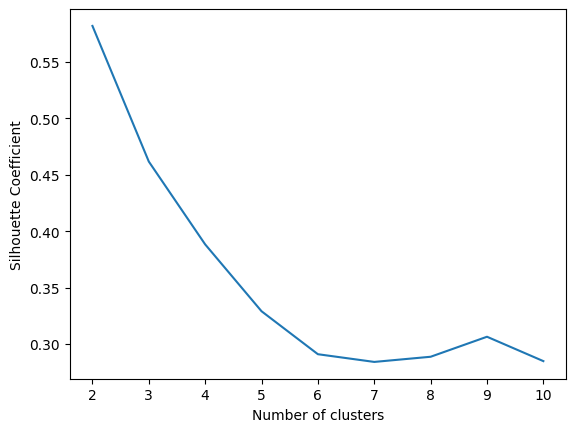

In [ ]:
## plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()